In [19]:
def read_monthly(pr_file,month):
    cube = iris.load_cube(pr_file, 'precipitation_flux')
    iris.coord_categorisation.add_month(cube, 'time')
    cube = cube.extract(iris.Constraint(month=month))
    return cube

def convert_pr_units(cube):
    cube.data = cube.data * 86400
    cube.units = 'mm/day'
    return cube

def plot_data(clim,month,gridlines=False,cmap='viridis_r'):
    fig = plt.figure(figsize=[12,5])
    iplt.contourf(clim, cmap=cmap, 
                  levels=numpy.arange(0, 10),
                  extend='max')
    plt.gca().coastlines()
    if gridlines:
        plt.gca().gridlines()
    cbar = plt.colorbar()
    cbar.set_label(str(cube.units))

    title = '%s precipitation climatology (%s)' %(cube.attributes['model_id'], month)
    plt.title(title)


In [22]:
def plot_pr_climatology(pr_file,mon,gridlines=False,cmap='viridis_r'):

    cube = read_monthly(pr_file,mon)
    cube = convert_pr_units(cube)
    clim = cube.collapsed('time', iris.analysis.MEAN)
    plot_data(clim,mon,gridlines=gridlines,cmap=cmap)

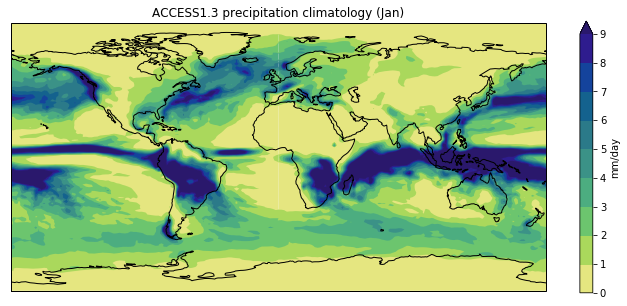

In [24]:
mon = 'Jan'
pr_file = 'data/pr_Amon_ACCESS1-3_historical_r1i1p1_200101-200512.nc'
plot_pr_climatology(pr_file,mon,cmap=cmocean.cm.haline_r)

In [25]:
help(iris)

Help on package iris:

NAME
    iris - A package for handling multi-dimensional data and associated metadata.

DESCRIPTION
    .. note ::
    
        The Iris documentation has further usage information, including
        a :ref:`user guide <user_guide_index>` which should be the first port of
        call for new users.
    
    The functions in this module provide the main way to load and/or save
    your data.
    
    The :func:`load` function provides a simple way to explore data from
    the interactive Python prompt. It will convert the source data into
    :class:`Cubes <iris.cube.Cube>`, and combine those cubes into
    higher-dimensional cubes where possible.
    
    The :func:`load_cube` and :func:`load_cubes` functions are similar to
    :func:`load`, but they raise an exception if the number of cubes is not
    what was expected. They are more useful in scripts, where they can
    provide an early sanity check on incoming data.
    
    The :func:`load_raw` function is p